In [10]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA dataset/TCGA_Colon_Cancer_(COAD)/TCGA.COAD.sampleMap_COAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA dataset/TCGA_Colon_Cancer_(COAD)/TCGA.COAD.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [12]:
clinical_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,_GENOMIC_ID_TCGA_COAD_RPPA_RBN,_GENOMIC_ID_TCGA_COAD_gistic2,_GENOMIC_ID_TCGA_COAD_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_COAD_exp_GAV2,_GENOMIC_ID_TCGA_COAD_exp_GAV2_exon,_GENOMIC_ID_TCGA_COAD_gistic2thd,_GENOMIC_ID_TCGA_COAD_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_COAD_G4502A_07_3,_GENOMIC_ID_TCGA_COAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_COAD_hMethyl27
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,NaN,NaN,MSS,NaN,NaN,TCGA-3L-AA1B-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-3L-AA1B-01A-11D-A36W-01,58746677-c72b-4f75-bf2b-d4428d58aec5,NaN,NaN,TCGA-3L-AA1B-01A-11D-A36W-01,58746677-c72b-4f75-bf2b-d4428d58aec5,NaN,TCGA-3L-AA1B-01,NaN
TCGA-4N-A93T-01,NaN,NaN,MSS,NaN,NaN,TCGA-4N-A93T-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-4N-A93T-01A-11D-A36W-01,a07d6a16-b755-4bfb-a982-eb5906cdc0f6,NaN,NaN,TCGA-4N-A93T-01A-11D-A36W-01,a07d6a16-b755-4bfb-a982-eb5906cdc0f6,NaN,TCGA-4N-A93T-01,NaN
TCGA-4T-AA8H-01,NaN,NaN,Indeterminate,NaN,NaN,TCGA-4T-AA8H-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-4T-AA8H-01A-11D-A40O-01,16689efe-1dcc-46f8-9c81-c8d7d81306a6,NaN,NaN,TCGA-4T-AA8H-01A-11D-A40O-01,16689efe-1dcc-46f8-9c81-c8d7d81306a6,NaN,TCGA-4T-AA8H-01,NaN
TCGA-5M-AAT4-01,NaN,NaN,MSS,NaN,NaN,TCGA-5M-AAT4-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-5M-AAT4-01A-11D-A40O-01,7d32ee7b-77a7-4c50-923f-a870221640e5,NaN,NaN,TCGA-5M-AAT4-01A-11D-A40O-01,7d32ee7b-77a7-4c50-923f-a870221640e5,NaN,TCGA-5M-AAT4-01,NaN
TCGA-5M-AAT5-01,NaN,NaN,MSI-L,NaN,NaN,TCGA-5M-AAT5-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-5M-AAT5-01A-21D-A40O-01,66ea9a6e-0bfa-4eab-a96d-a8982d433d9c,NaN,NaN,TCGA-5M-AAT5-01A-21D-A40O-01,66ea9a6e-0bfa-4eab-a96d-a8982d433d9c,NaN,TCGA-5M-AAT5-01,NaN


In [13]:
gene_fullname = 'POLE gene'
gene = 'pole'
condition = 'height'
condition_col = 'height'
trait = 'Colon Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 132 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-CA-5256-01,0.297608,-1.837526,-0.531035,-1.291872,-0.452178,0.69019,-1.117394,-1.494646,-0.423399,-3.075172,...,-0.748878,-1.587117,-0.399933,-0.66949,-1.193977,-2.413686,-1.700127,1.419905,-1.593333,0.773288
TCGA-AZ-6599-01,1.257208,-3.211026,-0.531035,-0.089772,-0.584878,-0.57371,-0.568894,-1.780946,-0.423399,-1.890372,...,-0.748878,-0.993017,-2.647833,0.05691,-0.901177,-2.964986,-2.580427,0.469905,-1.370633,0.465088
TCGA-AA-3655-01,1.160508,-3.468926,0.018465,-0.271372,-1.034478,-0.83431,-0.857494,-0.556246,0.523101,-1.946572,...,-0.748878,-1.587117,-0.489533,-0.73189,-0.312477,-1.221286,-0.438427,1.278505,0.506567,0.234688
TCGA-A6-6137-01,1.193608,0.521174,-0.531035,-0.072272,-0.723578,-0.26531,-1.170894,-1.363246,-0.423399,-1.286672,...,-0.748878,2.625283,-0.723933,0.44441,-0.733377,-1.389086,-0.529427,0.103105,0.836067,0.152188
TCGA-CK-4952-01,0.702008,-3.604126,-0.531035,0.090828,-1.114178,-0.55471,-1.062294,-1.602446,0.071601,-0.702472,...,-0.748878,-1.587117,-1.638733,-1.28139,0.235923,-1.451686,-0.734027,-0.569695,-1.886133,-0.190812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AA-3489-11,0.563208,1.567574,-0.531035,-0.147072,0.577922,0.41569,-0.848494,1.453954,0.670001,-3.169272,...,1.190122,1.268083,1.226367,-1.28139,-0.530977,1.159314,-1.047327,1.446205,1.637267,1.250788
TCGA-DM-A1D4-01,0.680008,-3.099426,-0.531035,-0.052972,-1.988078,-0.34271,-0.413394,-2.659346,0.436801,-2.396072,...,-0.748878,-1.587117,-1.643733,-1.28139,-0.748077,-2.847086,-1.908027,1.597305,-5.525533,0.622388
TCGA-QG-A5YV-01,1.386608,-1.594726,-0.531035,-0.186672,-1.304978,-0.87011,-0.814494,-2.209946,-0.423399,-3.558172,...,-0.270078,-0.462217,-1.607233,1.58601,-0.104477,-2.179086,-1.884627,0.102905,-2.658133,0.361488
TCGA-CA-5796-01,0.763408,-4.366926,-0.531035,-0.243672,-0.185378,-0.09511,0.112806,-1.507546,-0.423399,-4.119472,...,-0.748878,-1.587117,-0.986133,-1.28139,-0.722377,-2.039686,-1.796727,1.314105,-1.060433,0.933288


In [14]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,NaN,NaN,MSS,NaN,NaN,TCGA-3L-AA1B-01,NaN,NaN,NaN,NaN,...,-0.748878,-0.034117,0.002867,1.00211,-0.349177,-0.617186,-0.564127,1.189605,1.265867,0.333188
TCGA-4N-A93T-01,NaN,NaN,MSS,NaN,NaN,TCGA-4N-A93T-01,NaN,NaN,NaN,NaN,...,-0.748878,3.199883,-1.707933,-1.28139,-0.260777,-2.458586,-1.853027,1.927305,-2.865233,-0.047712
TCGA-4T-AA8H-01,NaN,NaN,Indeterminate,NaN,NaN,TCGA-4T-AA8H-01,NaN,NaN,NaN,NaN,...,-0.748878,1.335083,-2.255633,-1.28139,-0.466377,-2.600886,-2.654627,0.931005,-2.132533,0.201188
TCGA-5M-AAT4-01,NaN,NaN,MSS,NaN,NaN,TCGA-5M-AAT4-01,NaN,NaN,NaN,NaN,...,-0.232578,-1.070817,-1.418933,0.16281,-0.267377,-1.509886,-0.550327,0.646005,-1.272133,-0.140812
TCGA-5M-AAT5-01,NaN,NaN,MSI-L,NaN,NaN,TCGA-5M-AAT5-01,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,-1.680633,-0.28919,-0.509977,-1.755586,-1.232127,0.625105,-2.016233,0.405588


In [15]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,height,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,173.00,1.513008,-0.002026,-0.531035,-0.071072,-0.865078,-0.81821,0.024706,0.799054,0.145701,...,-0.748878,-0.034117,0.002867,1.00211,-0.349177,-0.617186,-0.564127,1.189605,1.265867,0.333188
TCGA-4N-A93T-01,167.64,1.053208,-0.431026,-0.531035,-0.051372,-1.865578,0.03249,-0.819094,-2.489046,1.860601,...,-0.748878,3.199883,-1.707933,-1.28139,-0.260777,-2.458586,-1.853027,1.927305,-2.865233,-0.047712
TCGA-4T-AA8H-01,167.60,1.385708,-2.265826,-0.531035,0.130428,-1.120078,-0.64131,-0.618994,-2.043646,1.251701,...,-0.748878,1.335083,-2.255633,-1.28139,-0.466377,-2.600886,-2.654627,0.931005,-2.132533,0.201188
TCGA-5M-AAT4-01,0.00,0.708208,-3.403426,-0.014735,-0.346472,-1.825478,-0.53051,-0.769494,-1.134146,1.232601,...,-0.232578,-1.070817,-1.418933,0.16281,-0.267377,-1.509886,-0.550327,0.646005,-1.272133,-0.140812
TCGA-5M-AAT5-01,0.00,0.662908,-3.108026,-0.531035,-0.254772,-1.152978,-0.46081,-1.082994,-1.468646,0.156401,...,-0.748878,-1.587117,-1.680633,-0.28919,-0.509977,-1.755586,-1.232127,0.625105,-2.016233,0.405588


In [16]:

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,height,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Colon Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,173.00,1.513008,-0.002026,-0.531035,-0.071072,-0.865078,-0.81821,0.024706,0.799054,0.145701,...,-0.034117,0.002867,1.00211,-0.349177,-0.617186,-0.564127,1.189605,1.265867,0.333188,1
TCGA-4N-A93T-01,167.64,1.053208,-0.431026,-0.531035,-0.051372,-1.865578,0.03249,-0.819094,-2.489046,1.860601,...,3.199883,-1.707933,-1.28139,-0.260777,-2.458586,-1.853027,1.927305,-2.865233,-0.047712,1
TCGA-4T-AA8H-01,167.60,1.385708,-2.265826,-0.531035,0.130428,-1.120078,-0.64131,-0.618994,-2.043646,1.251701,...,1.335083,-2.255633,-1.28139,-0.466377,-2.600886,-2.654627,0.931005,-2.132533,0.201188,1
TCGA-5M-AAT4-01,0.00,0.708208,-3.403426,-0.014735,-0.346472,-1.825478,-0.53051,-0.769494,-1.134146,1.232601,...,-1.070817,-1.418933,0.16281,-0.267377,-1.509886,-0.550327,0.646005,-1.272133,-0.140812,1
TCGA-5M-AAT5-01,0.00,0.662908,-3.108026,-0.531035,-0.254772,-1.152978,-0.46081,-1.082994,-1.468646,0.156401,...,-1.587117,-1.680633,-0.28919,-0.509977,-1.755586,-1.232127,0.625105,-2.016233,0.405588,1


In [17]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

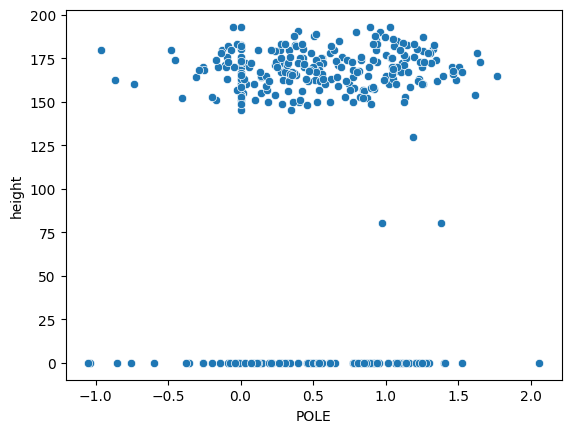

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_data' and 'condition_col' are defined elsewhere in your code
sns.scatterplot(data=merged_data, x='POLE', y=condition_col)
plt.show()


In [20]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,height,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Colon Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,0,1.513008,-0.002026,-0.531035,-0.071072,-0.865078,-0.81821,0.024706,0.799054,0.145701,...,-0.034117,0.002867,1.00211,-0.349177,-0.617186,-0.564127,1.189605,1.265867,0.333188,1
TCGA-4N-A93T-01,0,1.053208,-0.431026,-0.531035,-0.051372,-1.865578,0.03249,-0.819094,-2.489046,1.860601,...,3.199883,-1.707933,-1.28139,-0.260777,-2.458586,-1.853027,1.927305,-2.865233,-0.047712,1
TCGA-4T-AA8H-01,0,1.385708,-2.265826,-0.531035,0.130428,-1.120078,-0.64131,-0.618994,-2.043646,1.251701,...,1.335083,-2.255633,-1.28139,-0.466377,-2.600886,-2.654627,0.931005,-2.132533,0.201188,1
TCGA-5M-AAT4-01,0,0.708208,-3.403426,-0.014735,-0.346472,-1.825478,-0.53051,-0.769494,-1.134146,1.232601,...,-1.070817,-1.418933,0.16281,-0.267377,-1.509886,-0.550327,0.646005,-1.272133,-0.140812,1
TCGA-5M-AAT5-01,0,0.662908,-3.108026,-0.531035,-0.254772,-1.152978,-0.46081,-1.082994,-1.468646,0.156401,...,-1.587117,-1.680633,-0.28919,-0.509977,-1.755586,-1.232127,0.625105,-2.016233,0.405588,1


In [21]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

C:\Users\Bobibob\AppData\Local\Temp\ipykernel_24804\2284219672.py:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.7995121035841621


In [22]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [23]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For pole:
POLE: Coefficient = -0.000747282621995209, p-value = 0.9953860866211335
POLE4: Coefficient = 0.002225026540571368, p-value = 0.9787616515683415
POLE3: Coefficient = 0.013034845429817844, p-value = 0.9188033147204799
POLE2: Coefficient = -0.004998760705832821, p-value = 0.970604687442488

For height:
height: Coefficient = 0.0, p-value = 1.0



In [24]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between POLE gene and Colon Cancer when considering the influence of height?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the POLE gene and Colon Cancer when considering the influence of height.

Alternative Hypothesis (H1): There is an association between the expression of the POLE gene and Colon Cancer when considering the influence of height.




In [25]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: POLE
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: POLE4
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: POLE3
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: POLE2
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: height
Coefficient is zero, and it is not statistically significant (p-value >= 0.05).




In [26]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: POLE
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the POLE gene and Colon Cancer when considering the influence of height.

Variable: POLE4
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the POLE4 gene and Colon Cancer when considering the influence of height.

Variable: POLE3
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the POLE3 gene and Colon Cancer when considering the influence of height.

Variable: POLE2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the POLE2 gene and Colon Cancer when considering the influence of height.


